# YouTube Data Analysing
**Note:** This is not an official YouTube application, nor am I [@flofriday](https://github.com/flofriday), in any way associated with YouTube or Google.

This tool is free software, under the MIT License. \
[GitHub](https://github.com/flofriday/youtube-data)

In [17]:
# Import libaries
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import matplotlib as plt
import pandas as pd
from IPython.display import display, Markdown, Latex

import calendar
import json
import os
#%config HistoryManager.enabled = False
#%matplotlib inline
#%config InlineBackend.figure_formats = ['svg']

# Setup Matplotlib
plt.rcParams['figure.dpi'] = 400
pd

# Set the file paths
watch_history = os.path.join("data", "YouTube and YouTube Music", "history", "watch-history.json")
search_history = os.path.join("data", "YouTube and YouTube Music", "history", "search-history.json")

# Load the files
watch_df = pd.read_json(watch_history)
search_df = pd.read_json(search_history)

# Clean up the watch data
watch_df['channel'] = watch_df['subtitles'].map(lambda x: x[0]['name'] if type(x) is list else 'unknown')
watch_df['time'] =  pd.to_datetime(watch_df['time'], infer_datetime_format=True)
#watch_df.drop(columns=['subtitles', 'details', 'products', 'header'], inplace=True)

# Cleanup the search data
search_df['time'] =  pd.to_datetime(search_df['time'], infer_datetime_format=True)
#search_df.drop(columns=['products', 'header', 'titleUrl'], inplace=True)

# Specify the color
COLOR="#f2AAAA"

## Absolut numbers

In [18]:
display(Markdown(f"You watched **{len(watch_df)}** YouTube videos since *{watch_df['time'].min().strftime('%b %d %Y')}* <br>and searched **{len(search_df)}** times, since *{search_df['time'].min().strftime('%b %d %Y')}*."))

You watched **16400** YouTube videos since *Jun 15 2018* <br>and searched **8503** times, since *Jul 10 2015*.

## Creators you watch

In [20]:
@interact(watch_df=fixed(watch_df), number=widgets.IntSlider(min = 1, max=50, value=20))
def creator_plot(watch_df, number):
    df = watch_df['channel'].value_counts()
    df.drop(['unknown'], inplace=True)
    plot = df.head(number).plot(kind='bar', color=COLOR)
    plot.set_ylabel("videos watched")
    plot.set_title(f'Top {number} creators')
    

interactive(children=(IntSlider(value=20, description='number', max=50, min=1), Output()), _dom_classes=('widg…

## When you watch YouTube
### Overall

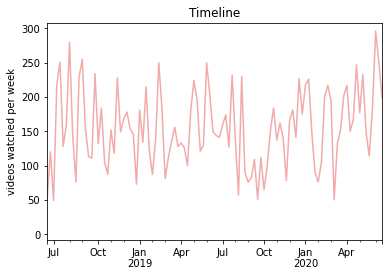

In [5]:
def timeline_plot(watch_df):
    df = pd.DataFrame(watch_df['time'])
    df.set_index('time', inplace=True)
    df['amount'] = 1
    df = df.resample('W').count()
    plot = df.plot(color=COLOR)
    plot.set_title('Timeline')
    plot.set_ylim(ymin= -0.03 * df['amount'].max())
    plot.set_ylabel("videos watched per week")
    plot.set_xlabel("")
    plot.get_legend().remove()

timeline_plot(watch_df)

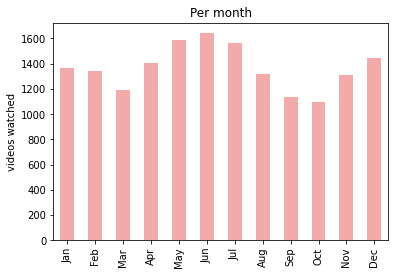

In [6]:
# Per Month
def month_plot(watch_df):
    #TODO: Rewrite this with value count
    df = pd.DataFrame()
    df['time'] = watch_df['time']
    df['amount'] = 1
    df = df.groupby(df['time'].dt.month).sum()
    df.index = df.index.map(lambda x: calendar.month_abbr[x])
    plot = df.plot(kind='bar', color=COLOR)
    plot.set_title('Per month')
    plot.set_ylabel("videos watched")
    plot.set_xlabel("")
    plot.get_legend().remove()

month_plot(watch_df)

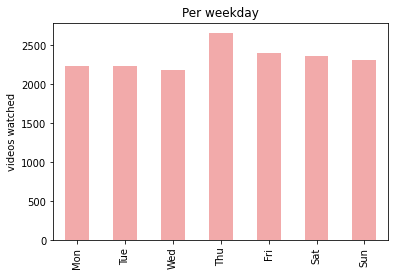

In [7]:
# Per weekday
def week_plot(watch_df):
    #TODO: Rewrite this with value count
    df = pd.DataFrame()
    df['time'] = watch_df['time']
    df['amount'] = 1
    df = df.groupby(df['time'].dt.dayofweek).sum()
    df.index = df.index.map(lambda x: calendar.day_abbr[x])
    plot = df.plot(kind='bar',color=COLOR)
    plot.set_title('Per weekday')
    plot.set_ylabel("videos watched")
    plot.set_xlabel("")
    plot.get_legend().remove()

week_plot(watch_df)

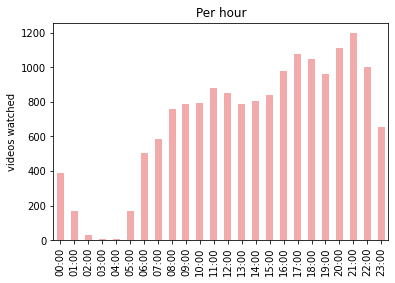

In [8]:
# Per hour
def hour_plot(watch_df):
    #TODO: Rewrite this with value count
    df = pd.DataFrame()
    df['time'] = watch_df['time']
    df['amount'] = 1
    df = df.groupby(df['time'].dt.hour).sum()
    df.index = df.index.map(lambda x: f"{x:02}:00")
    plot = df.plot(kind='bar', color=COLOR)
    plot.set_title('Per hour')
    plot.set_ylabel("videos watched")
    plot.set_xlabel("")
    plot.get_legend().remove()

hour_plot(watch_df)

## Searchterms

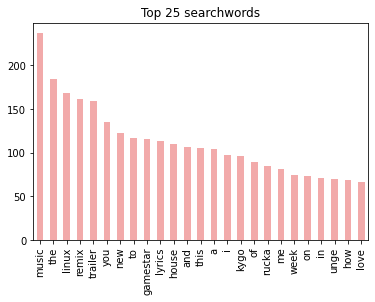

In [9]:
def word_plot(search_df):
    # Create a dataframe where the word column has in every row just a single word
    df = pd.DataFrame()
    df['title'] = search_df['title'].replace(regex=['Searched for'], value='')
    df = pd.DataFrame(df.title.str.split(' ').tolist()).stack()
    df = df.reset_index(0)
    df.columns = ['tmp', 'word']
    df = df.reset_index(0)
    df = pd.DataFrame(df.word)
    df['word'].replace('', np.nan, inplace=True)
    df.dropna(subset=['word'], inplace=True)
    
    # Create the plot
    threshold = 25
    df = df['word'].value_counts()
    plot = df.head(threshold).plot(kind='bar', color=COLOR)
    plot.set_title(f'Top {threshold} searchwords')
    
word_plot(search_df)